In [1]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Now you can import from src
from src.data_utils import load_and_process_taxi_data

import pandas as pd

import dagshub
dagshub.init(repo_owner='Sheethal-123', repo_name='sp25_taxi', mlflow=True)

Accessing as Sheethal-123

Initialized MLflow to track repo "Sheethal-123/sp25_taxi"

Repository Sheethal-123/sp25_taxi initialized!

In [2]:
rides1 = load_and_process_taxi_data(year=2022)
rides2=(load_and_process_taxi_data(year=2023))
rides = pd.concat([rides1,rides2],ignore_index=True)

File already exists for 2022-01.
Loading data for 2022-01...
Total records: 2,463,931
Valid records: 2,415,141
Records dropped: 48,790 (1.98%)
Successfully processed data for 2022-01.
File already exists for 2022-02.
Loading data for 2022-02...
Total records: 2,979,431
Valid records: 2,921,118
Records dropped: 58,313 (1.96%)
Successfully processed data for 2022-02.
File already exists for 2022-03.
Loading data for 2022-03...
Total records: 3,627,882
Valid records: 3,551,986
Records dropped: 75,896 (2.09%)
Successfully processed data for 2022-03.
File already exists for 2022-04.
Loading data for 2022-04...
Total records: 3,599,920
Valid records: 3,522,113
Records dropped: 77,807 (2.16%)
Successfully processed data for 2022-04.
File already exists for 2022-05.
Loading data for 2022-05...
Total records: 3,588,295
Valid records: 3,509,056
Records dropped: 79,239 (2.21%)
Successfully processed data for 2022-05.
File already exists for 2022-06.
Loading data for 2022-06...
Total records: 3,55

In [3]:
rides

,pickup_datetime,pickup_location_id
0,2022-01-01 00:35:40,142
1,2022-01-01 00:33:43,236
2,2022-01-01 00:53:21,166
3,2022-01-01 00:25:21,114
4,2022-01-01 00:36:48,68
...,...,...
62857551,2023-09-30 23:31:12,125
62857552,2023-09-30 23:42:18,236
62857553,2023-09-30 23:03:35,211
62857554,2023-09-30 23:57:05,209


In [6]:
from src.data_utils import transform_raw_data_into_ts_data

ts_data = transform_raw_data_into_ts_data(rides)
ts_data.head()

,pickup_hour,pickup_location_id,rides
0,2022-01-01 00:00:00,2,0
1,2022-01-01 01:00:00,2,0
2,2022-01-01 02:00:00,2,0
3,2022-01-01 03:00:00,2,0
4,2022-01-01 04:00:00,2,0


In [7]:
prop_df = ts_data[ts_data["pickup_location_id"] == 43]

In [8]:
prop_df.head()

,pickup_hour,pickup_location_id,rides
627792,2022-01-01 00:00:00,43,96
627793,2022-01-01 01:00:00,43,60
627794,2022-01-01 02:00:00,43,22
627795,2022-01-01 03:00:00,43,8
627796,2022-01-01 04:00:00,43,4


In [9]:
import pandas as pd

# Ensure ds column is in datetime format
prop_df['pickup_hour'] = pd.to_datetime(prop_df['pickup_hour'])

# Ensure y column is numeric
prop_df['rides'] = pd.to_numeric(prop_df['rides'])

# Check data
prop_df.head()


C:\Users\sheet\AppData\Local\Temp\ipykernel_29648\1325073704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_df['pickup_hour'] = pd.to_datetime(prop_df['pickup_hour'])
C:\Users\sheet\AppData\Local\Temp\ipykernel_29648\1325073704.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_df['rides'] = pd.to_numeric(prop_df['rides'])


,pickup_hour,pickup_location_id,rides
627792,2022-01-01 00:00:00,43,96
627793,2022-01-01 01:00:00,43,60
627794,2022-01-01 02:00:00,43,22
627795,2022-01-01 03:00:00,43,8
627796,2022-01-01 04:00:00,43,4


In [10]:
prop_df = prop_df.drop(columns=["pickup_location_id"])
prop_df

,pickup_hour,rides
627792,2022-01-01 00:00:00,96
627793,2022-01-01 01:00:00,60
627794,2022-01-01 02:00:00,22
627795,2022-01-01 03:00:00,8
627796,2022-01-01 04:00:00,4
...,...,...
643099,2023-09-30 19:00:00,147
643100,2023-09-30 20:00:00,123
643101,2023-09-30 21:00:00,95
643102,2023-09-30 22:00:00,130


In [11]:
prop_df = prop_df.rename(columns={'pickup_hour': 'ds', 'rides': 'y'})

# Ensure datetime format
prop_df['ds'] = pd.to_datetime(prop_df['ds'])

# Check the updated DataFrame
prop_df.head()


,ds,y
627792,2022-01-01 00:00:00,96
627793,2022-01-01 01:00:00,60
627794,2022-01-01 02:00:00,22
627795,2022-01-01 03:00:00,8
627796,2022-01-01 04:00:00,4


In [12]:
#pip install prophet

In [13]:
from prophet import Prophet
p = Prophet()

p.fit(prop_df)

21:07:36 - cmdstanpy - INFO - Chain [1] start processing
21:07:44 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Create a dataframe for the next 12 hours
future = p.make_future_dataframe(periods=12, freq='H')

# Generate forecast
forecast = p.predict(future)

# Display the last 12 predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))


                       ds       yhat  yhat_lower  yhat_upper
15312 2023-10-01 00:00:00   0.503631  -35.013681   35.084279
15313 2023-10-01 01:00:00  -9.955929  -44.554139   27.909542
15314 2023-10-01 02:00:00 -14.935105  -50.359636   23.677971
15315 2023-10-01 03:00:00 -16.265374  -50.015858   21.117407
15316 2023-10-01 04:00:00 -15.672447  -48.878619   21.256268
15317 2023-10-01 05:00:00 -12.592149  -51.499406   22.508896
15318 2023-10-01 06:00:00  -4.682907  -41.453569   28.677665
15319 2023-10-01 07:00:00   9.420082  -27.158572   43.723659
15320 2023-10-01 08:00:00  28.004316   -7.705278   66.595841
15321 2023-10-01 09:00:00  47.166177   10.350782   85.093434
15322 2023-10-01 10:00:00  63.958261   31.175764  102.899041
15323 2023-10-01 11:00:00  78.628207   41.929357  112.076648


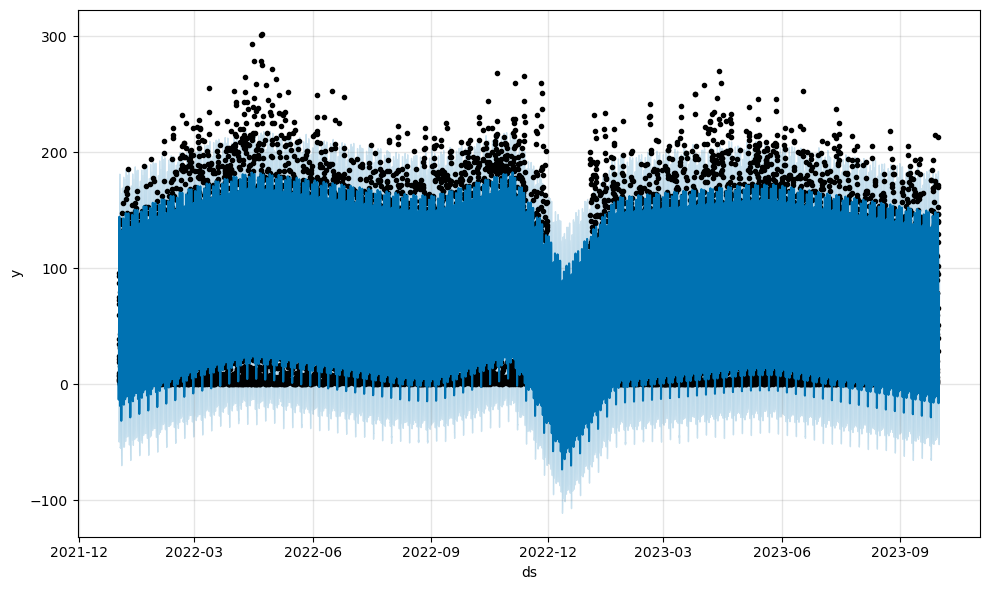

In [15]:
import matplotlib.pyplot as plt

# Plot forecast
fig = p.plot(forecast)
plt.show()


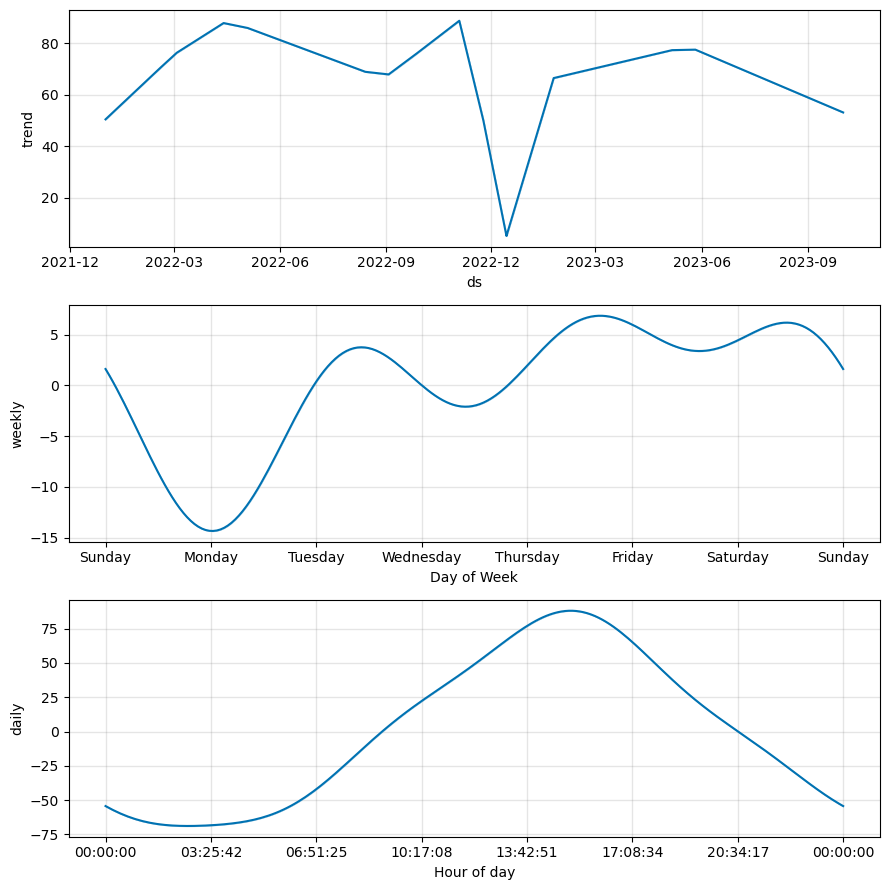

In [16]:
p.plot_components(forecast)
plt.show()


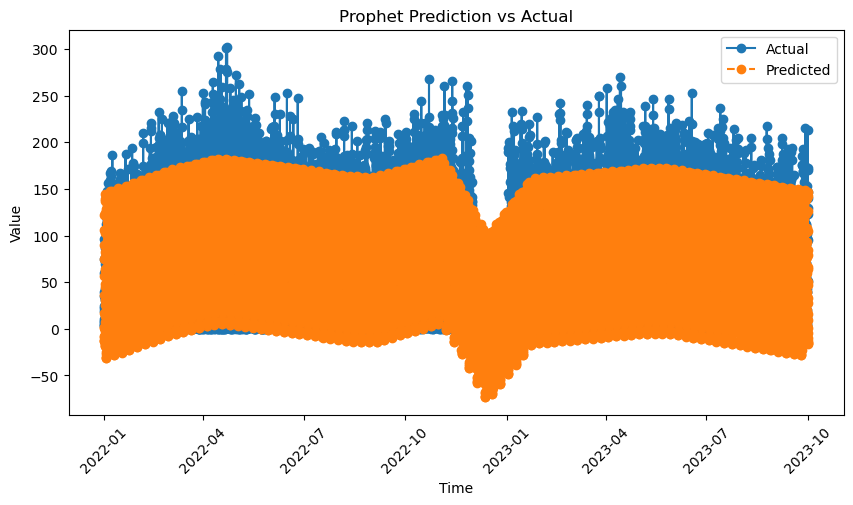

In [17]:
# Merge actual vs predicted values
results = prop_df.merge(forecast[['ds', 'yhat']], on='ds', how='right')

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(results['ds'], results['y'], label='Actual', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted', linestyle='dashed', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prophet Prediction vs Actual')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Merge actual values with predicted values
results = prop_df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

mae = mean_absolute_error(results.dropna()['y'], results.dropna()['yhat'])

print(f"MAE: {mae:.2f}")

MAE: 20.05


In [19]:
import mlflow
mlflow.set_experiment("Prophet")

# Start an MLflow run
with mlflow.start_run():
        mlflow.log_metric("mean_absolute_error", mae)

🏃 View run upbeat-bird-572 at: https://dagshub.com/Sheethal-123/sp25_taxi.mlflow/#/experiments/7/runs/39efb3c993ba4833ba3045b544d33fba
🧪 View experiment at: https://dagshub.com/Sheethal-123/sp25_taxi.mlflow/#/experiments/7


## Feature Training

In [20]:
p = Prophet(
    yearly_seasonality=False,  # Disable yearly since it's short-term
    weekly_seasonality=False,  # Disable weekly if not needed
    daily_seasonality=True
)

# Add hourly seasonality (important for 12-hour forecasts)
p.add_seasonality(name='hourly', period=24, fourier_order=12)

# Fit the model again
p.fit(prop_df)


21:08:03 - cmdstanpy - INFO - Chain [1] start processing
21:08:15 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
p = Prophet(changepoint_prior_scale=0.1)  # Default is 0.05, try increasing for more flexibility
p.fit(prop_df)

21:08:17 - cmdstanpy - INFO - Chain [1] start processing
21:08:26 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = p.make_future_dataframe(periods=12, freq='H')
forecast = p.predict(future)

In [23]:
# Merge actual values with predicted values
results = prop_df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

mae = mean_absolute_error(results.dropna()['y'], results.dropna()['yhat'])
print(f"Updated MAE: {mae:.2f}")

Updated MAE: 19.95
